In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import sklearn
import itertools
import matplotlib.pyplot as plt

In [4]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_multi_train = pd.read_csv("y_multi_train.csv")
y_multi_test = pd.read_csv("y_multi_test.csv")

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

20% label flipped

In [6]:
a, b = np.split(y_train, [int(.2*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod1 = pd.concat([a, b], axis=0)
y_train_mod1

label
31756       1
3578        0
34126       1
25770       1
7250        0
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [7]:
a, b = np.split(y_multi_train, [int(.2*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod1 = pd.concat([a, b], axis=0)
y_multi_train_mod1

attack_cat
31756            2
3578             0
34126            7
25770            6
7250             0
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8907536340970034
score on train: 0.8273127498117361
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     30772
           1       0.86      0.99      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.91      0.85      0.87     85028
weighted avg       0.90      0.89      0.89     85028



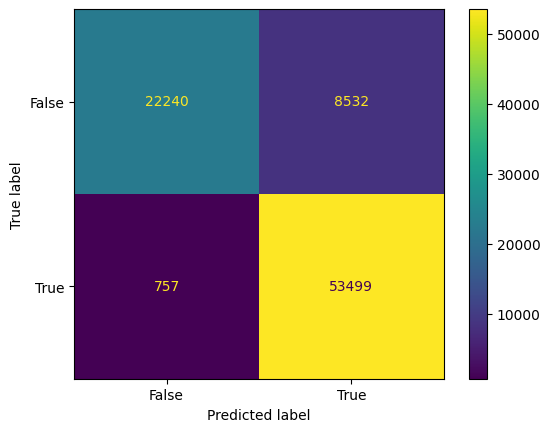

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod1)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9618


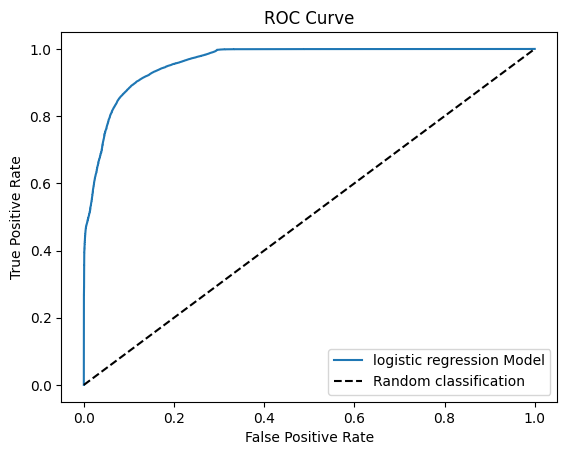

In [9]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-10-f1b35a1bb580>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod1)


score on test: 0.9362562920449734
score on train: 0.8691652667554887
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     30772
           1       0.93      0.98      0.95     54256

    accuracy                           0.94     85028
   macro avg       0.94      0.92      0.93     85028
weighted avg       0.94      0.94      0.94     85028



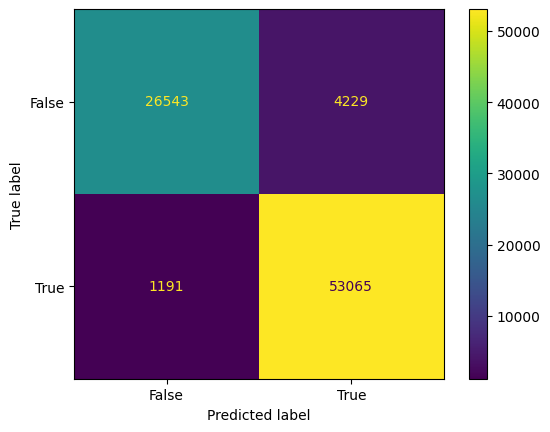

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rf1 = RandomForestClassifier(n_estimators=30, max_depth=9)
rf1.fit(X_train, y_train_mod1)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9882


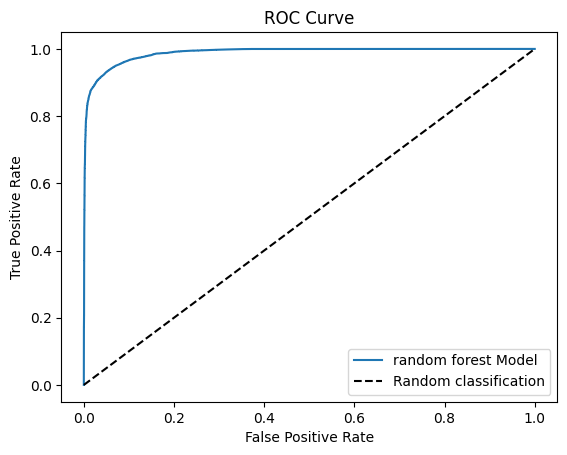

In [11]:
# ROC curve and AUC
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9638942466011197
score on train: 0.897034119214505
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     30772
           1       0.96      0.98      0.97     54256

    accuracy                           0.96     85028
   macro avg       0.96      0.96      0.96     85028
weighted avg       0.96      0.96      0.96     85028



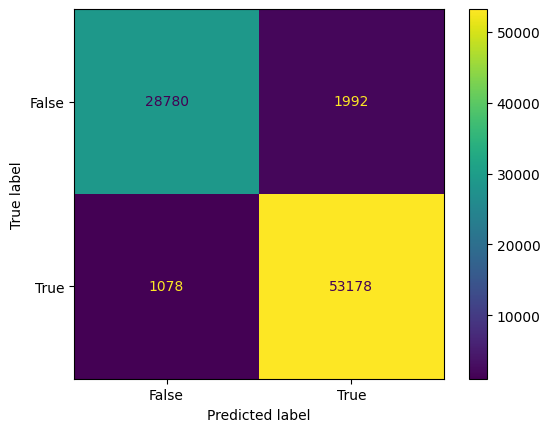

In [12]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod1)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod1)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9918


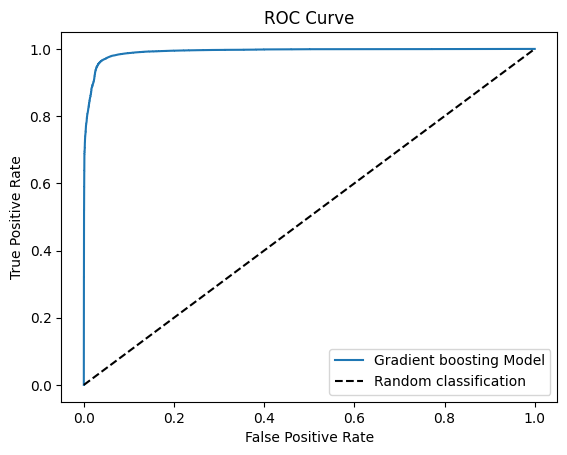

In [13]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [14]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.3946 - accuracy: 0.8416 - f1_m: 0.8790 - precision_m: 0.8558 - recall_m: 0.9058
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8553 - f1_m: 0.8875 - precision_m: 0.8785 - recall_m: 0.8984
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3701 - accuracy: 0.8598 - f1_m: 0.8905 - precision_m: 0.8851 - recall_m: 0.8975
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3669 - accuracy: 0.8626 - f1_m: 0.8926 - precision_m: 0.8883 - recall_m: 0.8984
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3635 - accuracy: 0.8654 - f1_m: 0.8946 - precision_m: 0.8918 - recall_m: 0.8987
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.3594 - accuracy: 0.8694 - f1_m: 0.8978 - precision_m: 0.8950 - recall_m: 0.9019
Epoch 7/100
1349/1349 [=======================

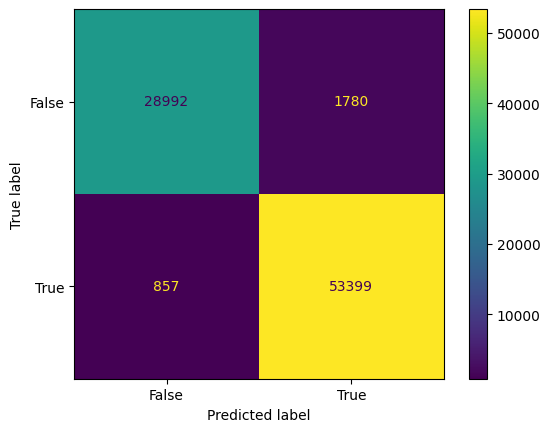

In [15]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import callbacks
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod1, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod1)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

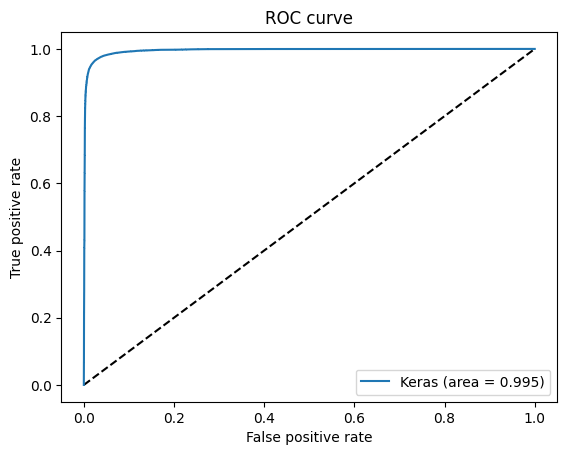

In [16]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [17]:
attack_cat=['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'Shellcode', 'Worms']
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

score on test: 0.5312602907277603
score on train: 0.7056247465678039
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     30772
           1       0.49      0.00      0.01     19423
           2       0.43      0.92      0.59     14709
           3       0.67      0.40      0.50      7921
           4       0.42      0.05      0.09      5357
           5       0.37      0.01      0.03      4578
           6       0.00      0.01      0.00       909
           7       0.54      0.03      0.05       780
           8       0.14      0.14      0.14       513
           9       0.61      0.17      0.26        66

    accuracy                           0.53     85028
   macro avg       0.46      0.26      0.26     85028
weighted avg       0.62      0.53      0.48     85028



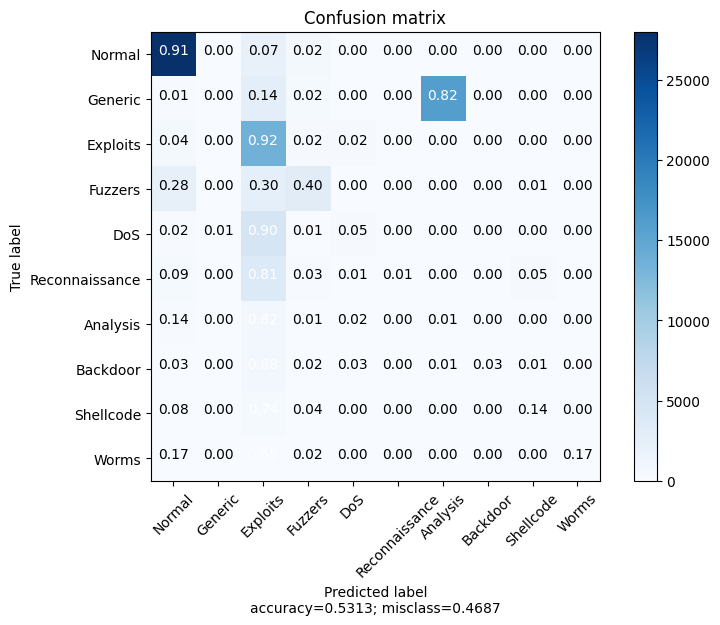

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod1)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [19]:
import yellowbrick
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    # Creating visualization
    visualizer = ROCAUC(model)
    # Fitting to the training data first then scoring with the test data
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer

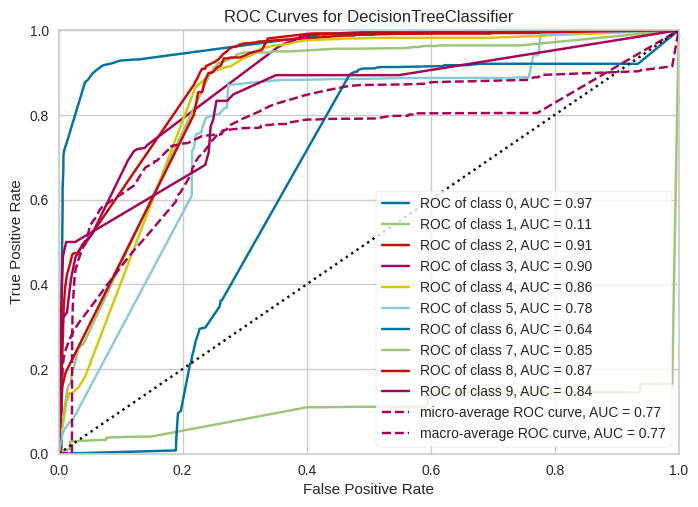

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [20]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod1, X_test, y_multi_test)

<ipython-input-21-f0a12db0080e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod1)


score on test: 0.7934797948910947
score on train: 0.712923593813358
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     30772
           1       0.99      0.97      0.98     19423
           2       0.55      0.92      0.69     14709
           3       0.67      0.52      0.59      7921
           4       0.72      0.01      0.01      5357
           5       0.84      0.35      0.50      4578
           6       1.00      0.01      0.01       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.79     85028
   macro avg       0.57      0.37      0.37     85028
weighted avg       0.80      0.79      0.76     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


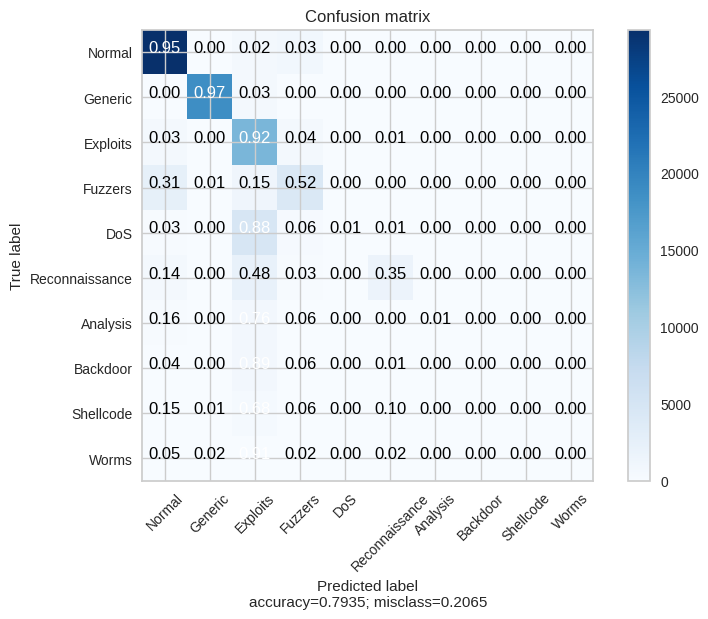

In [21]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod1)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)

cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

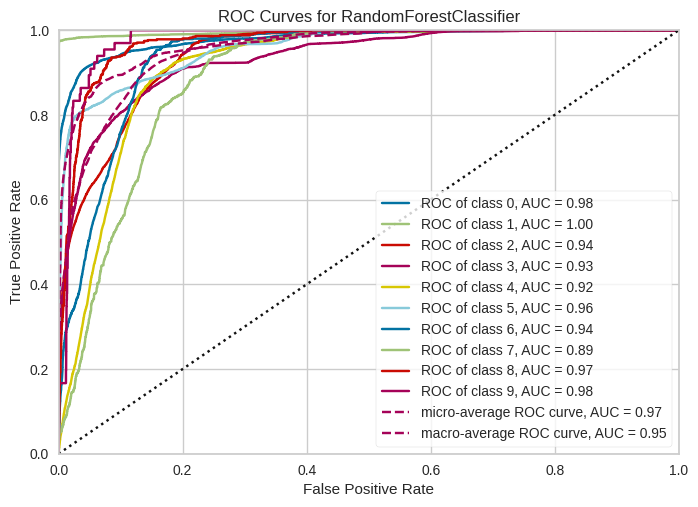

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [22]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod1, X_test, y_multi_test)

score on test: 0.5965211459754434
score on train: 0.7593871285408098
              precision    recall  f1-score   support

           0       0.59      0.98      0.74     30772
           1       0.80      0.03      0.06     19423
           2       0.71      0.65      0.68     14709
           3       0.56      0.77      0.65      7921
           4       0.39      0.44      0.41      5357
           5       0.85      0.35      0.50      4578
           6       0.81      0.09      0.16       909
           7       0.08      0.05      0.06       780
           8       0.43      0.29      0.35       513
           9       0.71      0.08      0.14        66

    accuracy                           0.60     85028
   macro avg       0.59      0.37      0.37     85028
weighted avg       0.66      0.60      0.52     85028



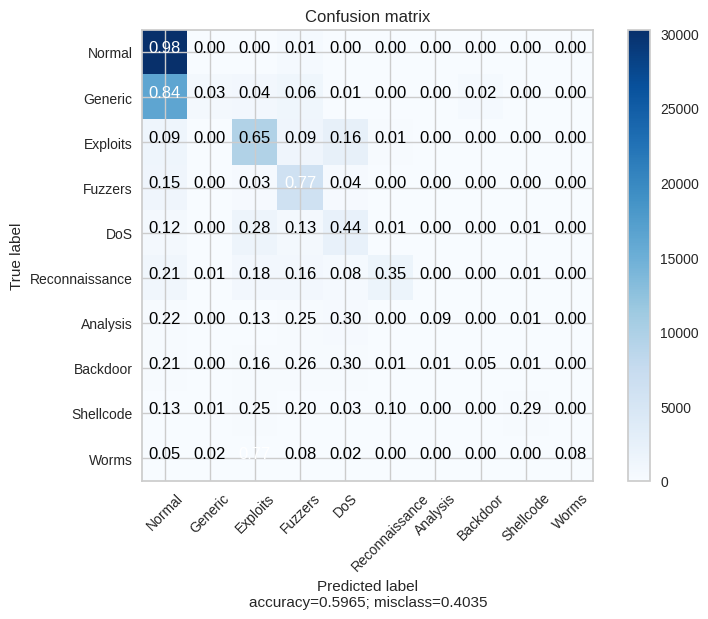

In [23]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod1)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod1)))
print(metrics.classification_report(y_multi_test, y_pred))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

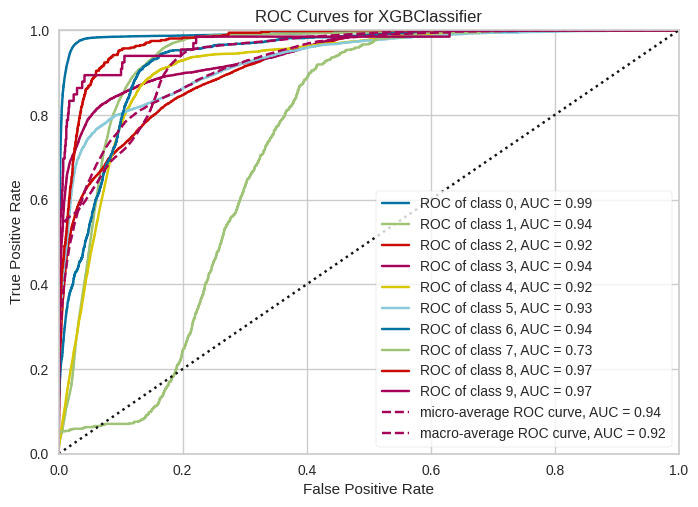

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [24]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod1, X_test, y_multi_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5504      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
338/338 [==============================] - 2s 4ms/step - loss: 1.1798 - accuracy: 0.6197 - f1_m: 1.7677 - precision_m: 9852072.0000 - recall_m: 1.6481
Epoch 2/100
338/338

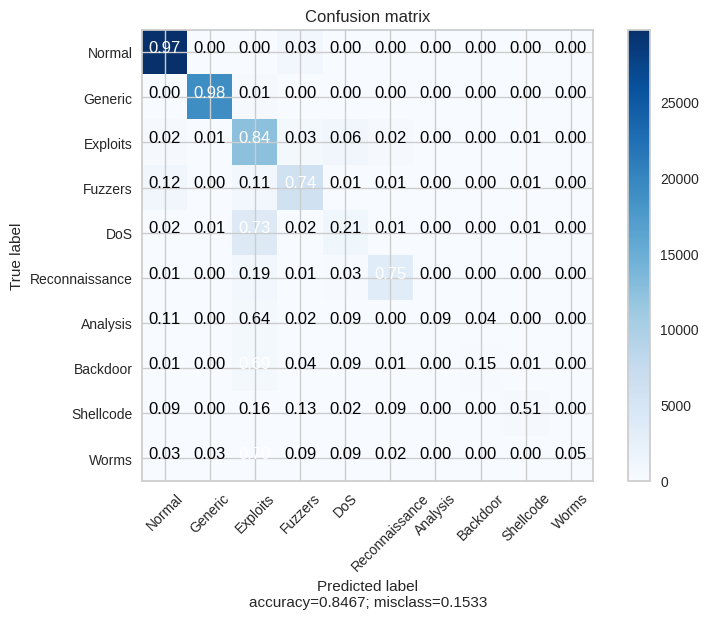

In [25]:
from keras import metrics
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod1,epochs=100,batch_size=512,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)
#loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_multi_test, verbose=0)
print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod1)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.755116622739403


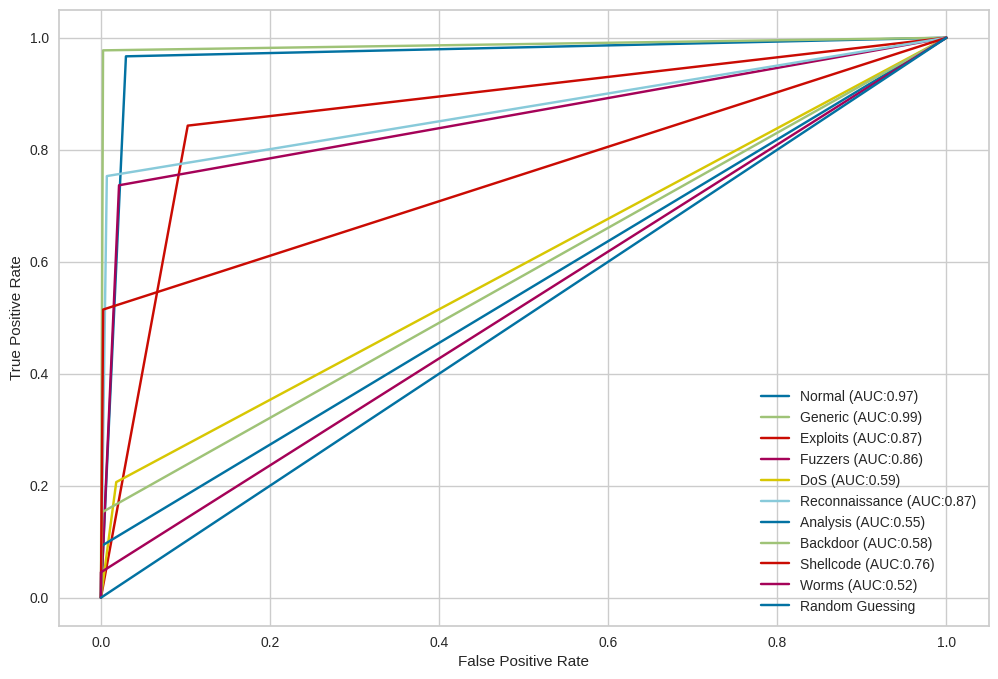

In [26]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
from sklearn.preprocessing import LabelBinarizer

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(attack_cat):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

50% label flipped

In [27]:
a, b = np.split(y_train, [int(.5*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod2 = pd.concat([a, b], axis=0)
y_train_mod2

label
29050       1
30576       1
79491       0
46352       1
347         1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [28]:
a, b = np.split(y_multi_train, [int(.5*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod2 = pd.concat([a, b], axis=0)
y_multi_train_mod2

attack_cat
29050            1
30576            2
79491            0
46352            1
347              5
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.8892600084677988
score on train: 0.7292185599258529
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     30772
           1       0.86      0.99      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.92      0.85      0.87     85028
weighted avg       0.90      0.89      0.88     85028



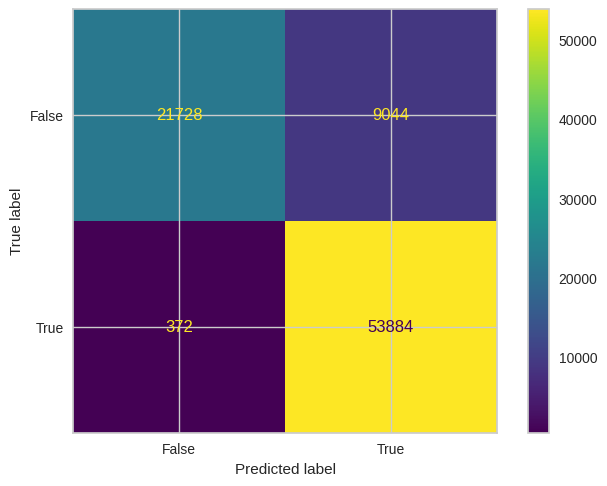

In [30]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod2)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9602


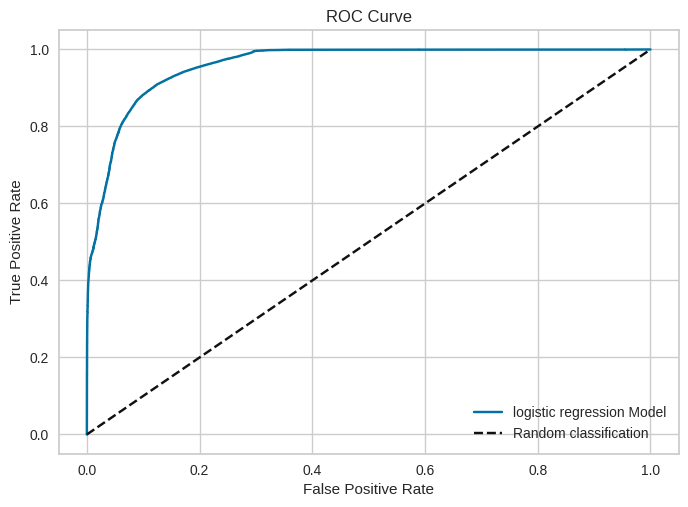

In [31]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-32-44ebd7d56fda>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod2)


score on test: 0.891706261466811
score on train: 0.7484330649365696
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     30772
           1       0.86      1.00      0.92     54256

    accuracy                           0.89     85028
   macro avg       0.93      0.85      0.87     85028
weighted avg       0.91      0.89      0.89     85028



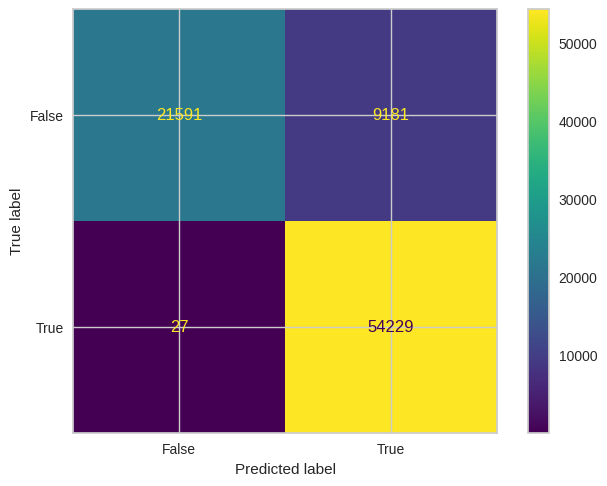

In [32]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=9)
rf1.fit(X_train, y_train_mod2)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.952744978124853
score on train: 0.7710015640386955
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     30772
           1       0.95      0.98      0.96     54256

    accuracy                           0.95     85028
   macro avg       0.96      0.94      0.95     85028
weighted avg       0.95      0.95      0.95     85028



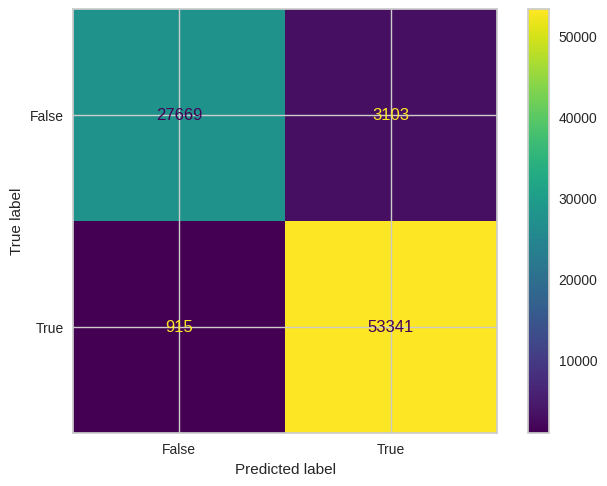

In [34]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod2)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod2)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9904


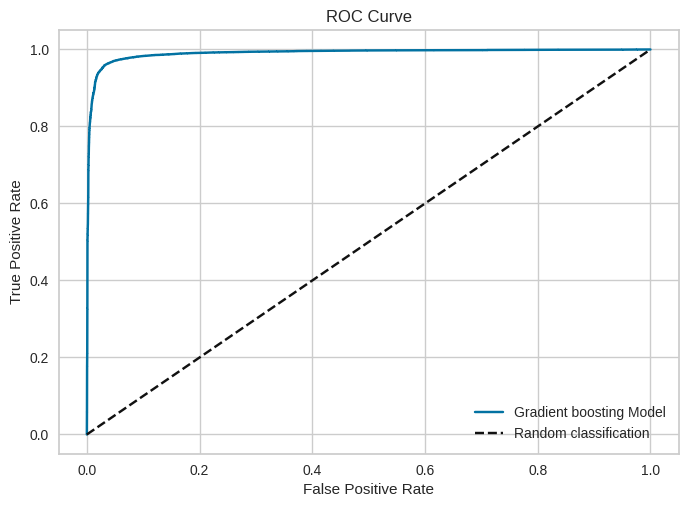

In [35]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7297 - f1_m: 0.8022 - precision_m: 0.7523 - recall_m: 0.8618
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5580 - accuracy: 0.7349 - f1_m: 0.8026 - precision_m: 0.7640 - recall_m: 0.8477
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5554 - accuracy: 0.7367 - f1_m: 0.8019 - precision_m: 0.7709 - recall_m: 0.8377
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5537 - accuracy: 0.7394 - f1_m: 0.8025 - precision_m: 0.7762 - recall_m: 0.8328
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5524 - accuracy: 0.7406 - f1_m: 0.8025 - precision_m: 0.7793 - recall_m: 0.8295
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.5515 - accuracy: 0.7415 - f1_m: 0.8025 - precision_m: 0.7824 - recall_m: 0.8259
Epoch 7/100
1349/1349 [=======================

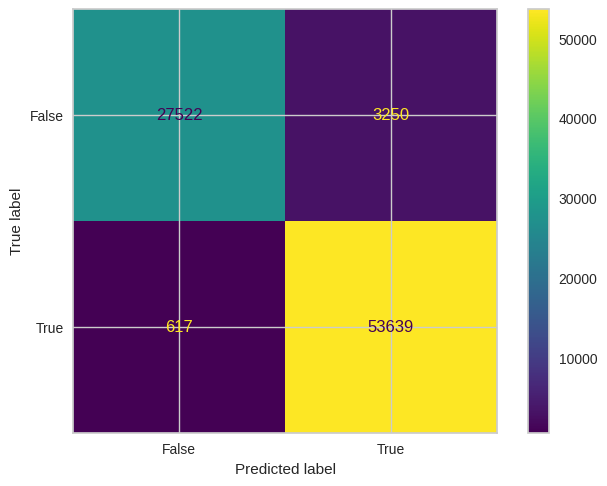

In [36]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod2, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod2)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

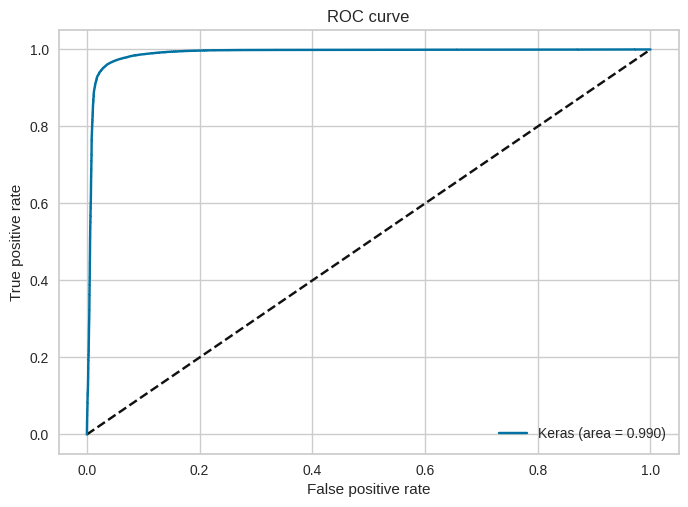

In [37]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.5318365714823352
score on train: 0.5357064241441233
              precision    recall  f1-score   support

           0       0.83      0.92      0.88     30772
           1       0.45      0.03      0.06     19423
           2       0.40      0.90      0.55     14709
           3       0.65      0.32      0.43      7921
           4       0.47      0.03      0.06      5357
           5       0.55      0.04      0.07      4578
           6       0.29      0.00      0.01       909
           7       0.00      0.02      0.00       780
           8       0.21      0.02      0.03       513
           9       0.00      0.00      0.00        66

    accuracy                           0.53     85028
   macro avg       0.38      0.23      0.21     85028
weighted avg       0.60      0.53      0.47     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


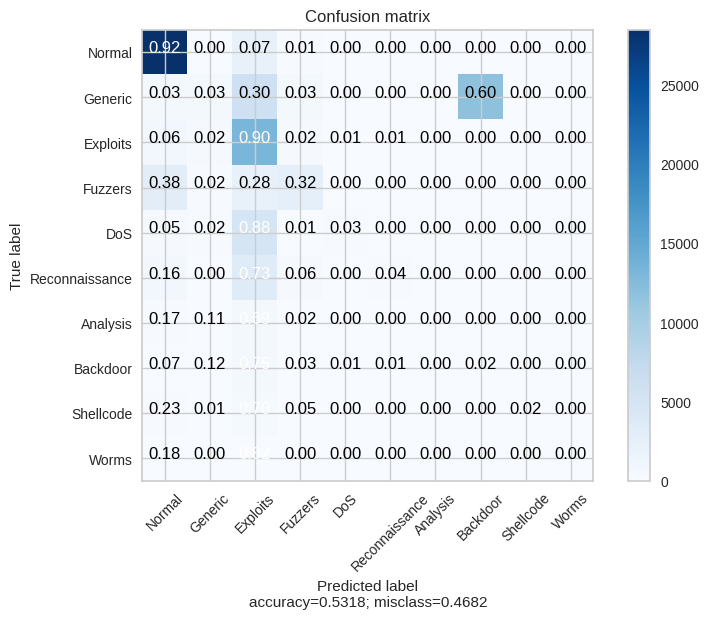

In [38]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod2)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

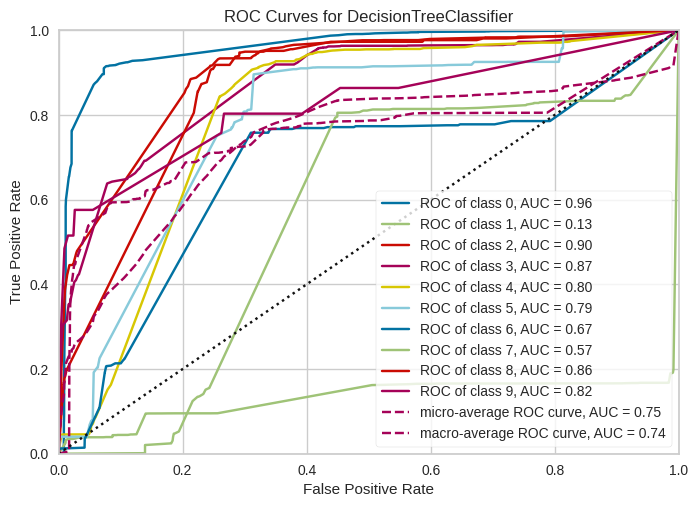

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [39]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod2, X_test, y_multi_test)

<ipython-input-40-781c4e9c342e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod2)


score on test: 0.6605118313967164
score on train: 0.5371604008573249
              precision    recall  f1-score   support

           0       0.58      0.99      0.73     30772
           1       1.00      0.59      0.74     19423
           2       0.64      0.78      0.70     14709
           3       0.82      0.29      0.43      7921
           4       0.85      0.01      0.01      5357
           5       1.00      0.11      0.20      4578
           6       1.00      0.01      0.01       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.66     85028
   macro avg       0.59      0.28      0.28     85028
weighted avg       0.74      0.66      0.61     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


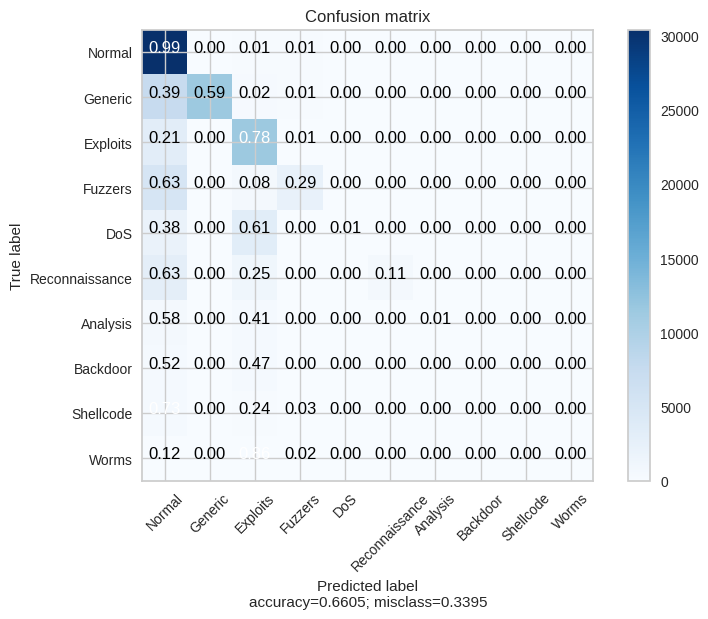

In [40]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod2)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)

cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

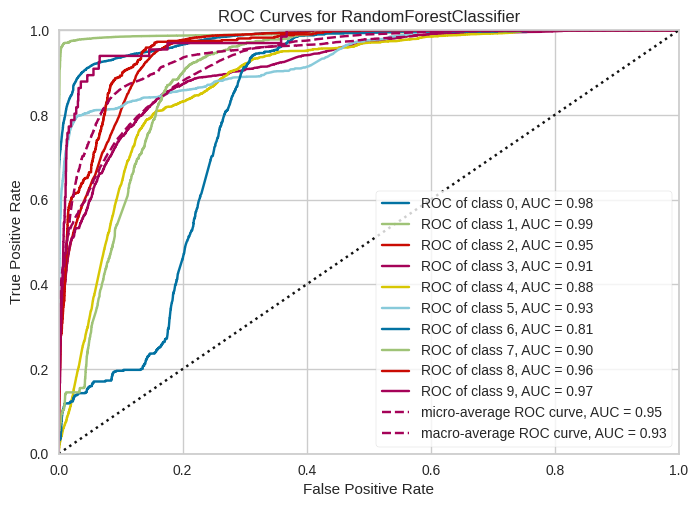

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [41]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod2, X_test, y_multi_test)

score on test: 0.5752693230465259
score on train: 0.5693216706250362
              precision    recall  f1-score   support

           0       0.54      0.98      0.69     30772
           1       0.15      0.01      0.01     19423
           2       0.61      0.79      0.69     14709
           3       0.74      0.60      0.66      7921
           4       0.48      0.03      0.05      5357
           5       0.84      0.46      0.60      4578
           6       0.82      0.02      0.04       909
           7       0.88      0.04      0.07       780
           8       0.54      0.24      0.34       513
           9       0.40      0.03      0.06        66

    accuracy                           0.58     85028
   macro avg       0.60      0.32      0.32     85028
weighted avg       0.50      0.58      0.47     85028



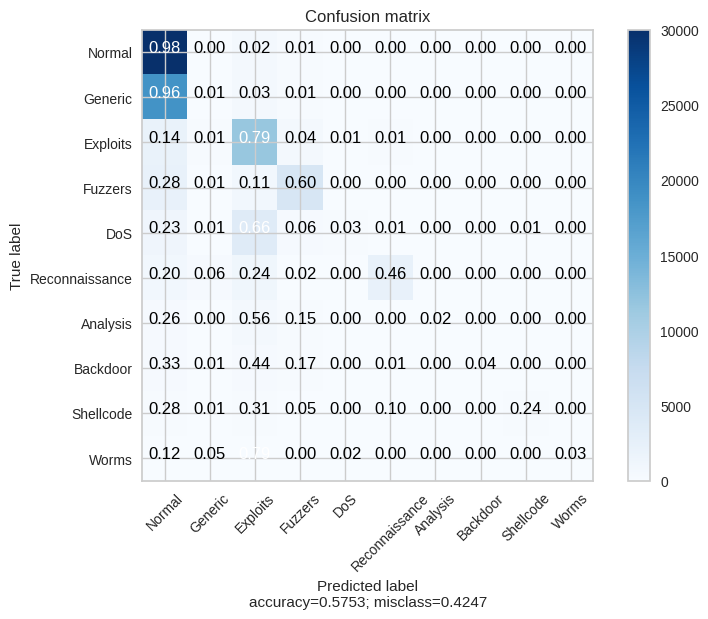

In [42]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod2)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod2)))
print(metrics.classification_report(y_multi_test, y_pred))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

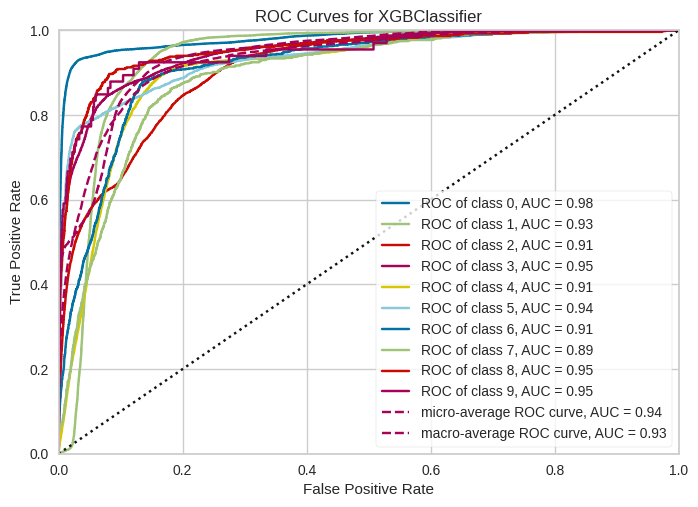

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [43]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod2, X_test, y_multi_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               5504      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
338/338 [==============================] - 2s 3ms/step - loss: 1.5151 - accuracy: 0.4838 - f1_m: 1.8327 - precision_m: 19408284.0000 - recall_m: 1.5707
Epoch 2/100
338/33

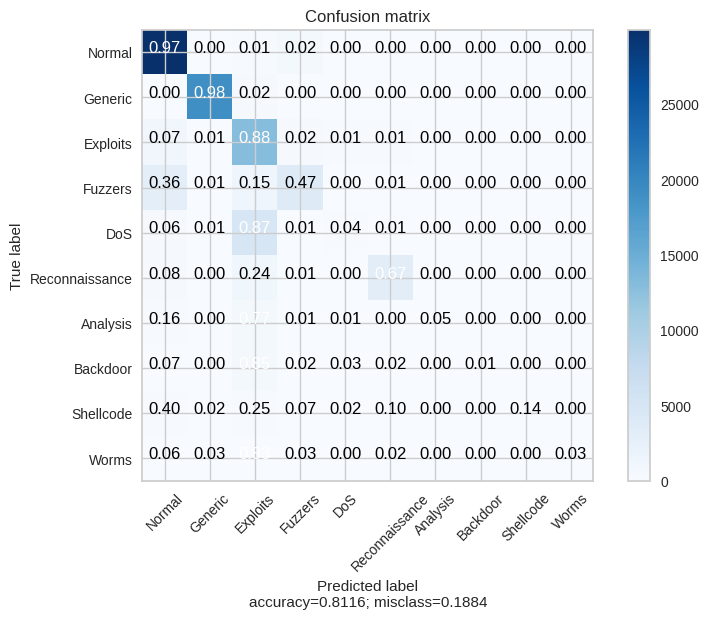

In [44]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod2,epochs=100,batch_size=512,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)

print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod2)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.6997058427625593


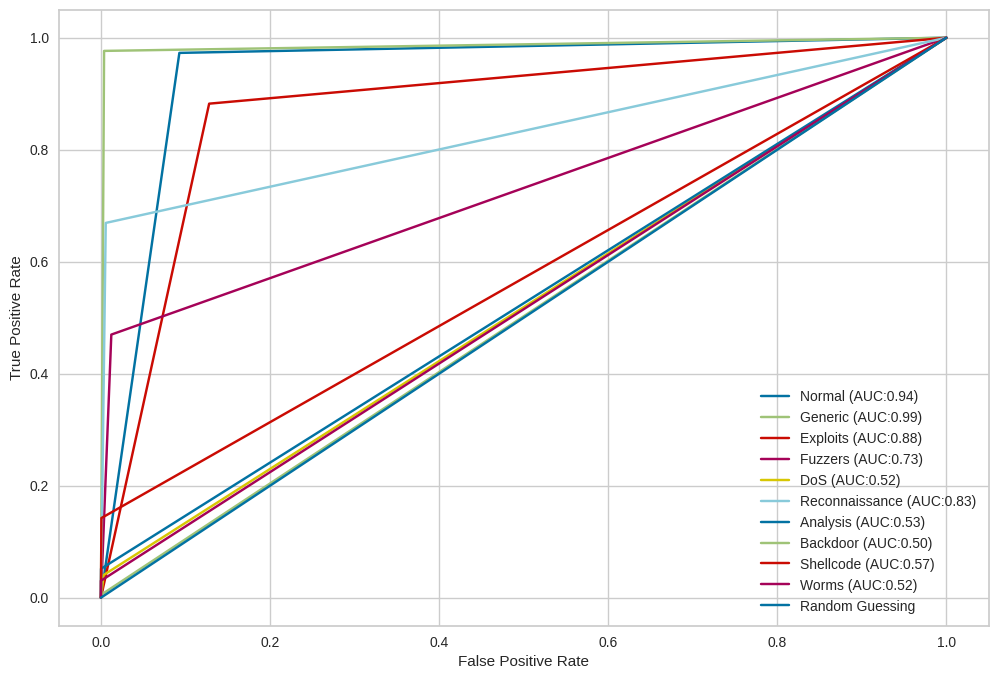

In [45]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

80% label flipped

In [46]:
a, b = np.split(y_train, [int(.8*len(y_train))])
a = a.sample(frac=1, random_state=42)
y_train_mod3 = pd.concat([a, b], axis=0)
y_train_mod3

label
80867       1
4981        1
1749        0
10189       1
6347        1
...       ...
172625      0
172626      0
172627      1
172628      1
172629      0

[172630 rows x 1 columns]

In [47]:
a, b = np.split(y_multi_train, [int(.8*len(y_multi_train))])
a = a.sample(frac=1, random_state=42)
y_multi_train_mod3 = pd.concat([a, b], axis=0)
y_multi_train_mod3

attack_cat
80867            5
4981             1
1749             0
10189            2
6347             1
...            ...
172625           0
172626           0
172627           2
172628           2
172629           0

[172630 rows x 1 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.6953944582960907
score on train: 0.6388924288941668
              precision    recall  f1-score   support

           0       0.99      0.16      0.27     30772
           1       0.68      1.00      0.81     54256

    accuracy                           0.70     85028
   macro avg       0.83      0.58      0.54     85028
weighted avg       0.79      0.70      0.61     85028



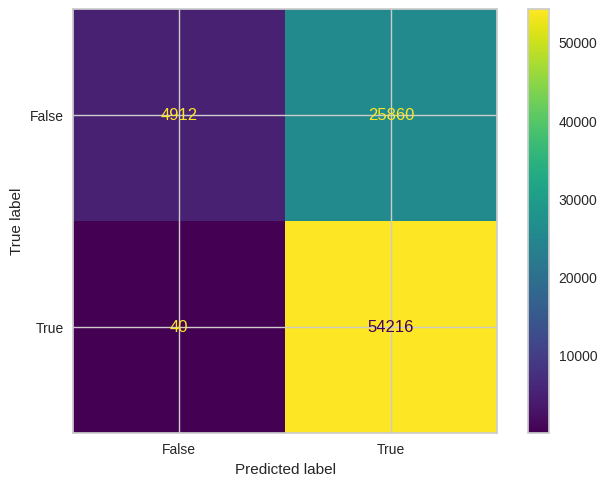

In [48]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train_mod3)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9583


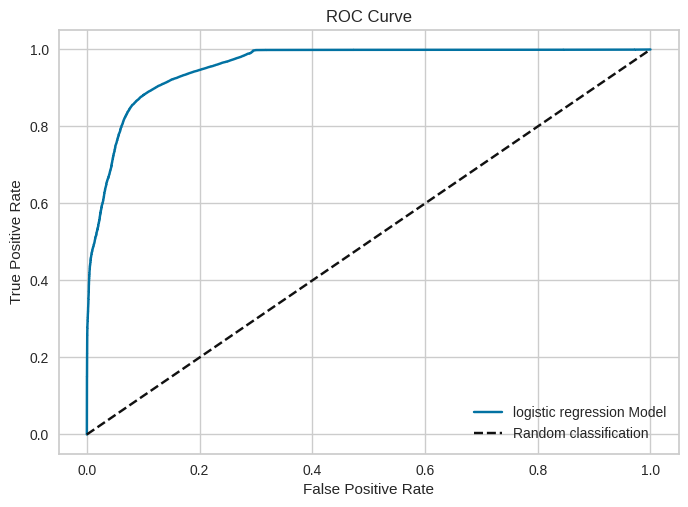

In [49]:
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-50-54293982d204>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train_mod3)


score on test: 0.7052500352824952
score on train: 0.6546428778311997
              precision    recall  f1-score   support

           0       1.00      0.19      0.31     30772
           1       0.68      1.00      0.81     54256

    accuracy                           0.71     85028
   macro avg       0.84      0.59      0.56     85028
weighted avg       0.80      0.71      0.63     85028



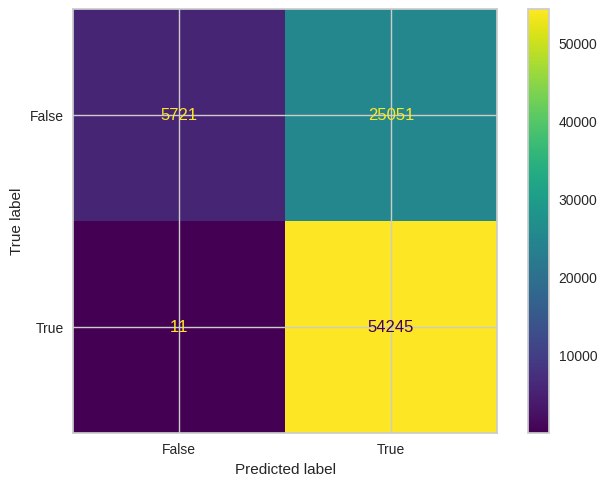

In [50]:
rf1 = RandomForestClassifier(n_estimators=30, max_depth=9)
rf1.fit(X_train, y_train_mod3)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9616


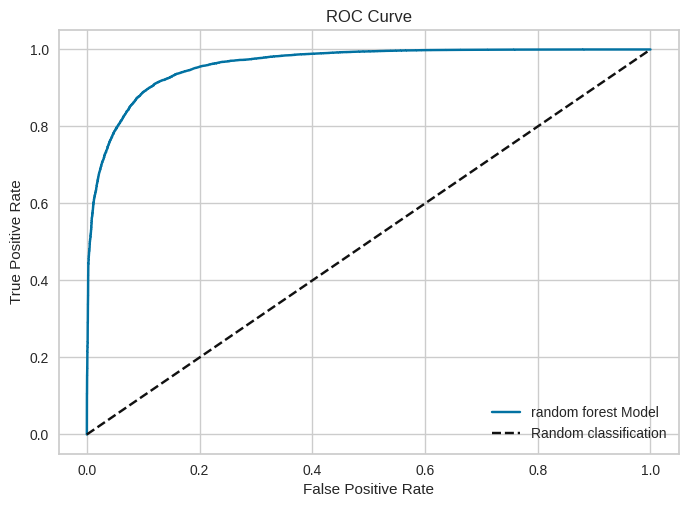

In [51]:
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.7521757538693137
score on train: 0.6741817760528298
              precision    recall  f1-score   support

           0       0.95      0.33      0.49     30772
           1       0.72      0.99      0.84     54256

    accuracy                           0.75     85028
   macro avg       0.84      0.66      0.66     85028
weighted avg       0.81      0.75      0.71     85028



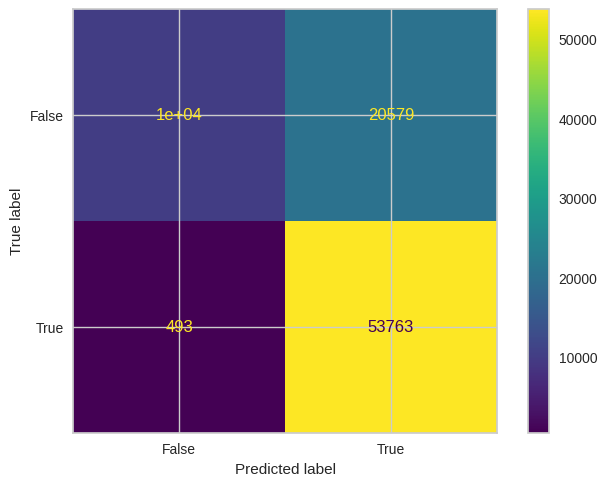

In [52]:
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train_mod3)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train_mod3)))
print(metrics.classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

AUC: 0.9294


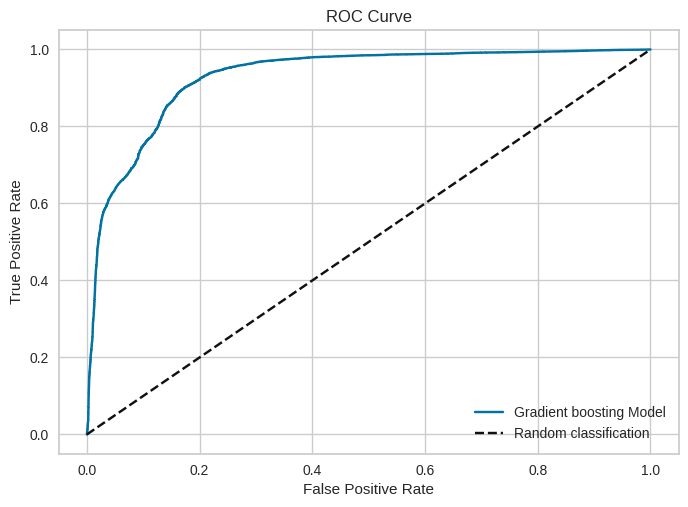

In [53]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='Gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 4s 2ms/step - loss: 0.6427 - accuracy: 0.6380 - f1_m: 0.7725 - precision_m: 0.6446 - recall_m: 0.9689
Epoch 2/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6405 - accuracy: 0.6394 - f1_m: 0.7788 - precision_m: 0.6400 - recall_m: 0.9974
Epoch 3/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6401 - accuracy: 0.6393 - f1_m: 0.7773 - precision_m: 0.6414 - recall_m: 0.9896
Epoch 4/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6398 - accuracy: 0.6394 - f1_m: 0.7783 - precision_m: 0.6406 - recall_m: 0.9942
Epoch 5/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6395 - accuracy: 0.6394 - f1_m: 0.7779 - precision_m: 0.6410 - recall_m: 0.9921
Epoch 6/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6394 - accuracy: 0.6392 - f1_m: 0.7771 - precision_m: 0.6415 - recall_m: 0.9882
Epoch 7/100
1349/1349 [=======================

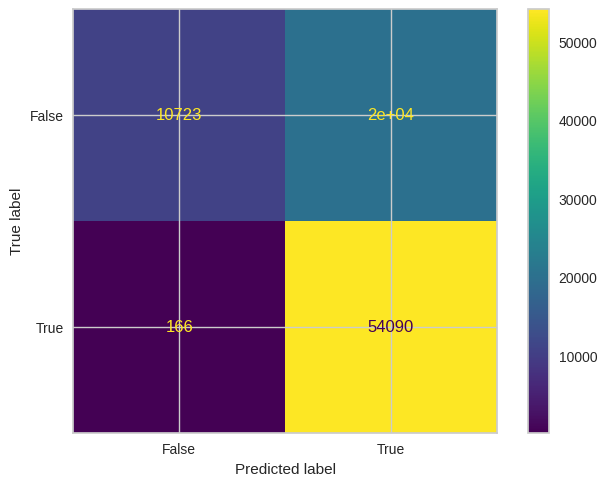

In [54]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy', f1_m, precision_m, recall_m])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train_mod3, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train_mod3)[1]))
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

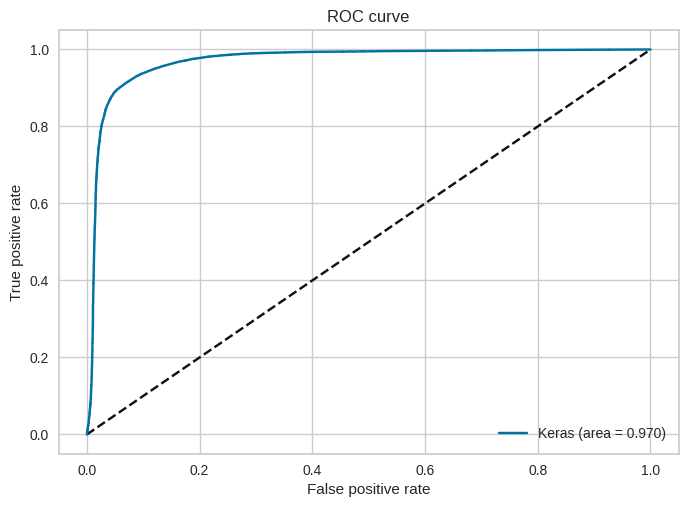

In [55]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

score on test: 0.6239826880556993
score on train: 0.3929212767189944
              precision    recall  f1-score   support

           0       0.51      0.99      0.67     30772
           1       0.95      0.87      0.91     19423
           2       0.78      0.37      0.50     14709
           3       0.38      0.01      0.02      7921
           4       0.19      0.00      0.00      5357
           5       0.82      0.04      0.07      4578
           6       0.50      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.70      0.01      0.03       513
           9       0.00      0.00      0.00        66

    accuracy                           0.62     85028
   macro avg       0.48      0.23      0.22     85028
weighted avg       0.64      0.62      0.54     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


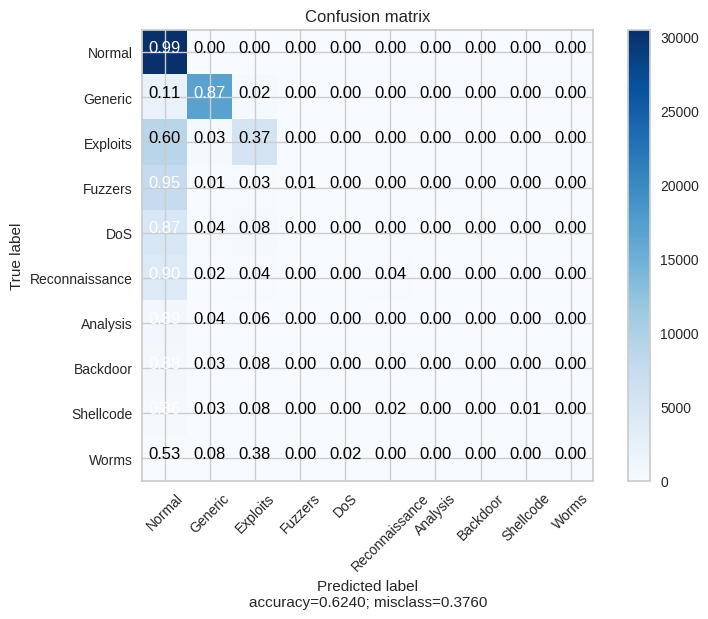

In [56]:
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train_mod3)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

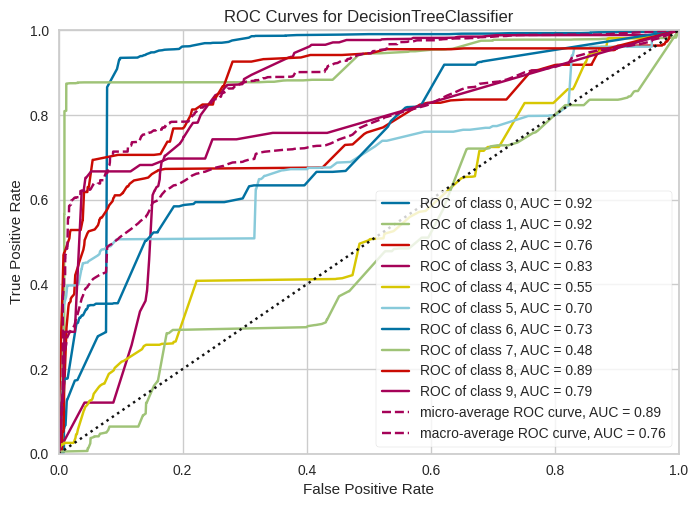

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [57]:
plot_ROC_curve(dtree1, X_train, y_multi_train_mod3, X_test, y_multi_test)

<ipython-input-58-6cabfee57120>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod3)


score on test: 0.5309780307663358
score on train: 0.3951862364594798
              precision    recall  f1-score   support

           0       0.44      1.00      0.61     30772
           1       0.98      0.55      0.70     19423
           2       0.91      0.25      0.40     14709
           3       0.86      0.00      0.00      7921
           4       1.00      0.00      0.00      5357
           5       0.00      0.00      0.00      4578
           6       0.00      0.00      0.00       909
           7       0.00      0.00      0.00       780
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        66

    accuracy                           0.53     85028
   macro avg       0.42      0.18      0.17     85028
weighted avg       0.68      0.53      0.45     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


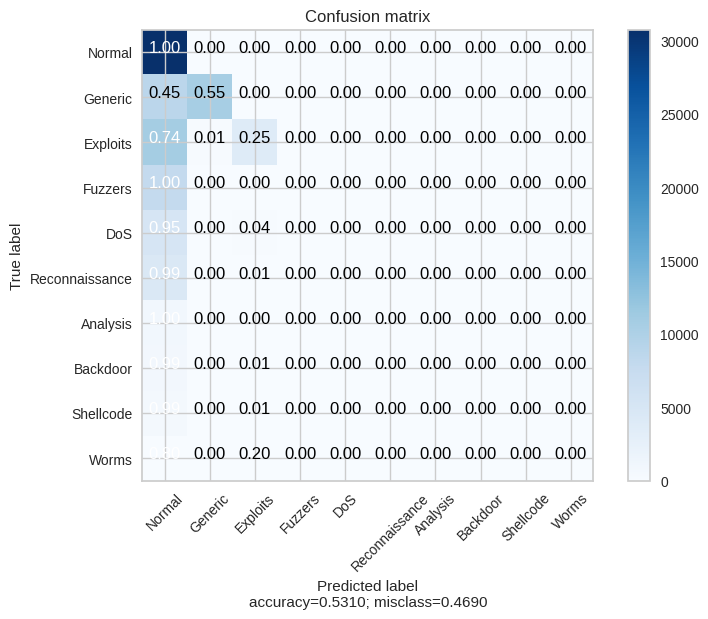

In [58]:
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train_mod3)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)

cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

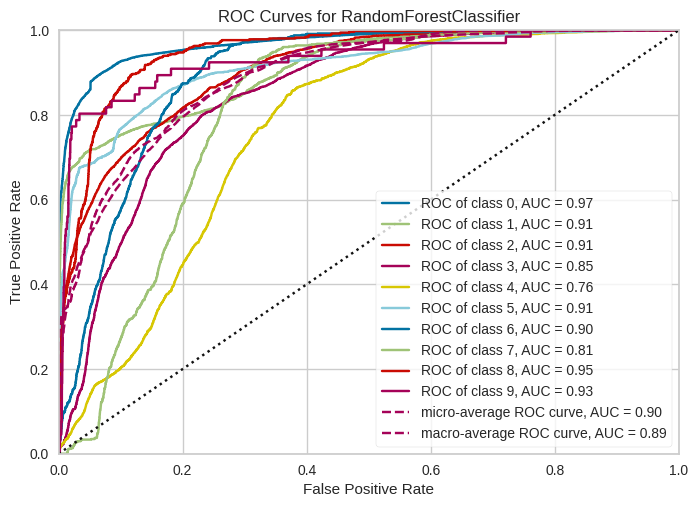

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [59]:
plot_ROC_curve(rf2, X_train, y_multi_train_mod3, X_test, y_multi_test)

score on test: 0.40683069106647224
score on train: 0.42152001390256616
              precision    recall  f1-score   support

           0       0.40      0.99      0.57     30772
           1       0.13      0.01      0.02     19423
           2       0.59      0.20      0.30     14709
           3       0.86      0.11      0.19      7921
           4       0.16      0.02      0.04      5357
           5       0.78      0.02      0.04      4578
           6       1.00      0.00      0.01       909
           7       1.00      0.00      0.00       780
           8       0.28      0.03      0.05       513
           9       0.00      0.00      0.00        66

    accuracy                           0.41     85028
   macro avg       0.52      0.14      0.12     85028
weighted avg       0.43      0.41      0.28     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


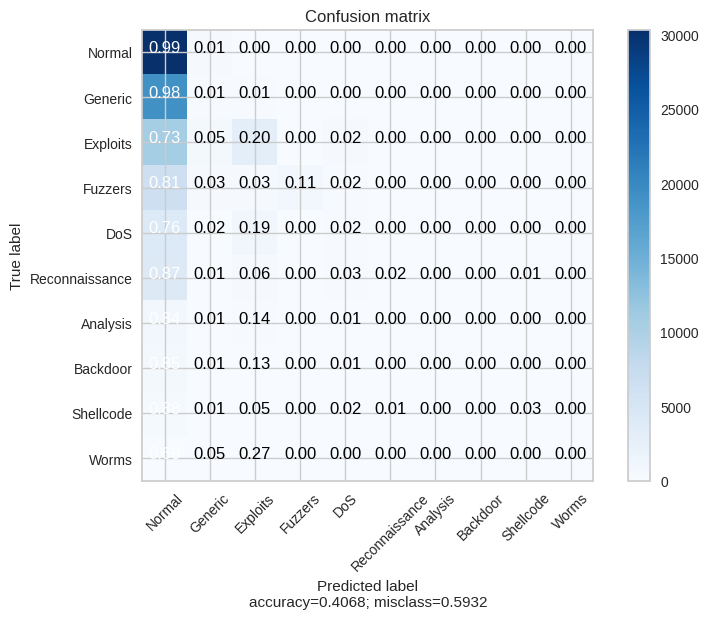

In [60]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train_mod3)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train_mod3)))
print(metrics.classification_report(y_multi_test, y_pred))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

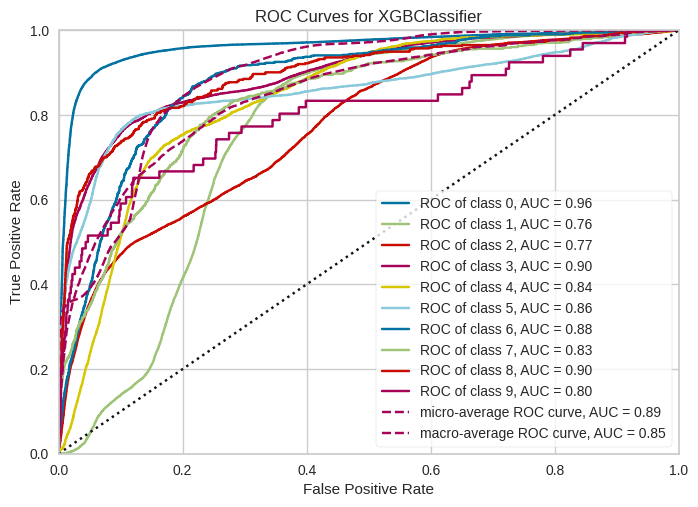

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [61]:
plot_ROC_curve(xgb2, X_train, y_multi_train_mod3, X_test, y_multi_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               5504      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
338/338 [==============================] - 2s 3ms/step - loss: 1.6802 - accuracy: 0.3777 - f1_m: 2.6709 - precision_m: 25976332.0000 - recall_m: 1.4787
Epoch 2/100
338/33

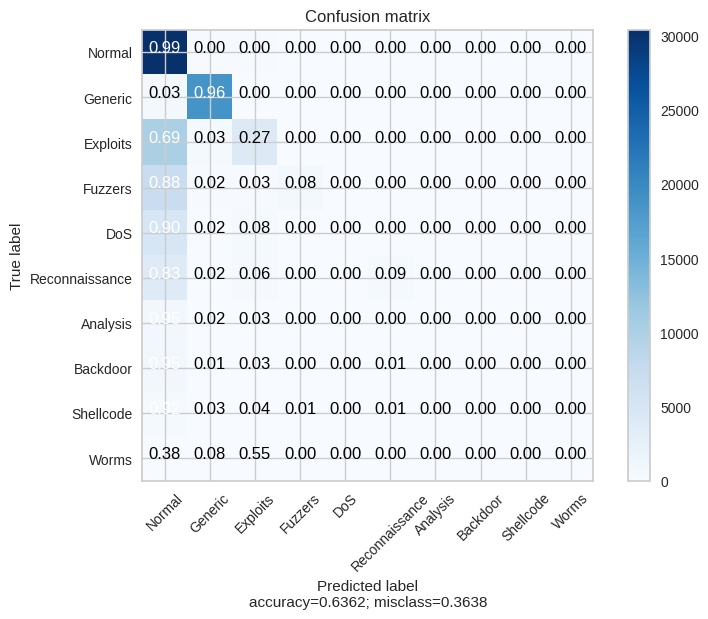

In [62]:
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy", f1_m, precision_m, recall_m])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train_mod3,epochs=100,batch_size=512,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)
y_pred = []
for el in y_pred_arr:
    ind = np.argmax(el)
    y_pred.append(ind)

print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train_mod3)[1]))
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

ROC AUC score: 0.5913029702141002


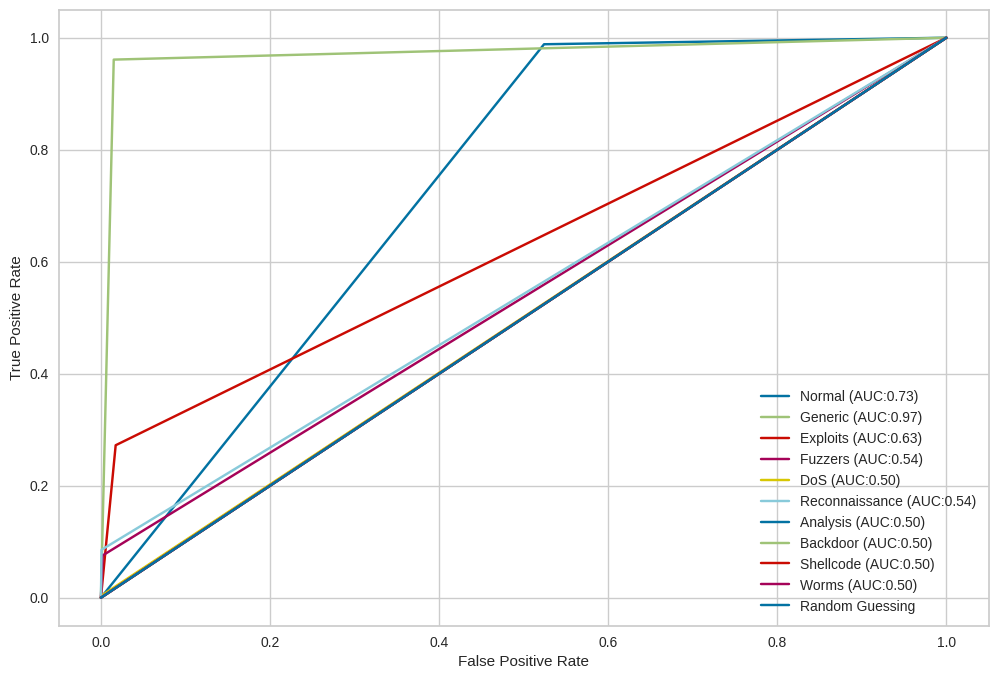

In [63]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()